In [2]:
library(Seurat)
library(Signac)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [ ]:
# used 28ppn in home-epigen

# merged object of 4 lung pool samples is 5.5GB

# surprisingly took around 45 min

In [ ]:
## clustered rna, atac, and wnn 
## did not batch correct any of these
## wrote out umaps

In [3]:
sobj <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/03_multiome_merge/231026_merged_multiome_lung4.RDS")

In [4]:
sobj

An object of class Seurat 
219775 features across 80000 samples within 3 assays 
Active assay: ATAC_comb (151268 features, 0 variable features)
 2 other assays present: RNA, SCT

In [9]:
sobj[['RNA']]

Assay data with 36601 features for 80000 cells
First 10 features:
 MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2,
AL627309.5, AL627309.4, AP006222.2, AL732372.1 

In [10]:
sobj[['SCT']]

SCTAssay data with 31906 features for 80000 cells, and 4 SCTModel(s) 
First 10 features:
 AL627309.1, AL627309.3, AL627309.5, AL627309.4, AP006222.2, AL669831.2,
LINC01409, FAM87B, LINC01128, LINC00115 

In [5]:
table(sobj$orig.ident)


QY_2225_2_QY_2224_2 QY_2227_2_QY_2226_2 QY_2229_2_QY_2228_2 QY_2231_2_QY_2230_2 
              20000               20000               20000               20000 

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



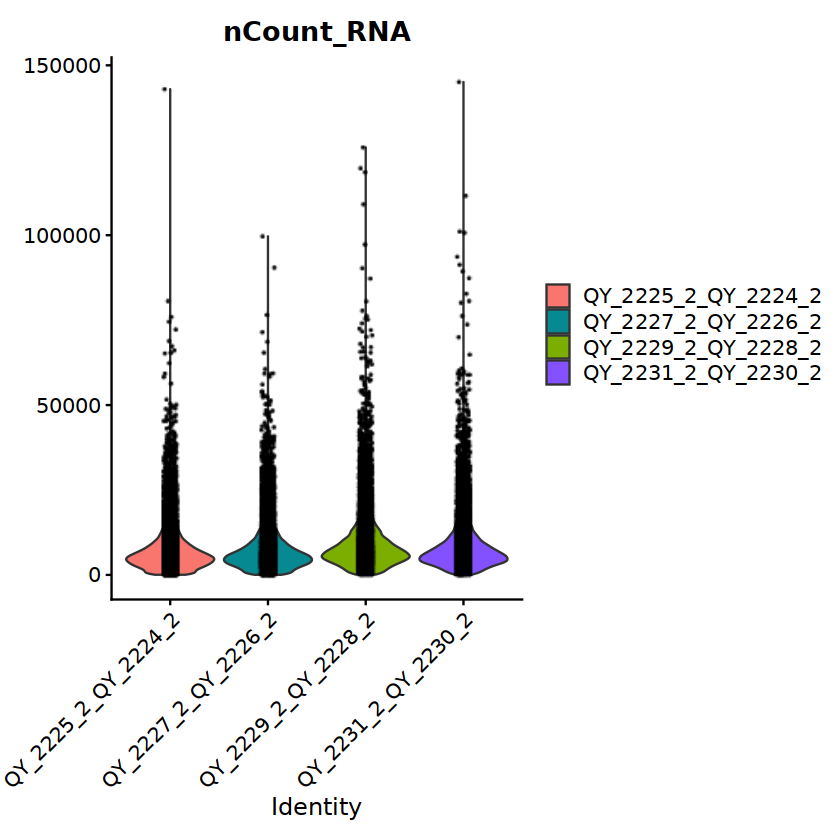

In [6]:
VlnPlot(sobj, "nCount_RNA", split.by = "orig.ident")

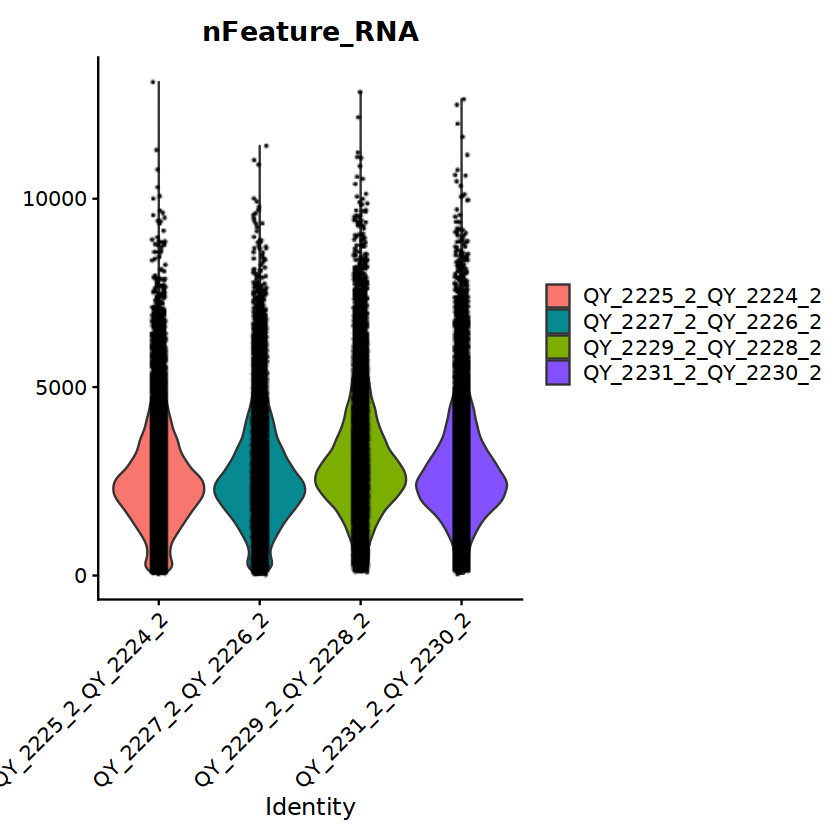

In [7]:
VlnPlot(sobj, "nFeature_RNA", split.by = "orig.ident")

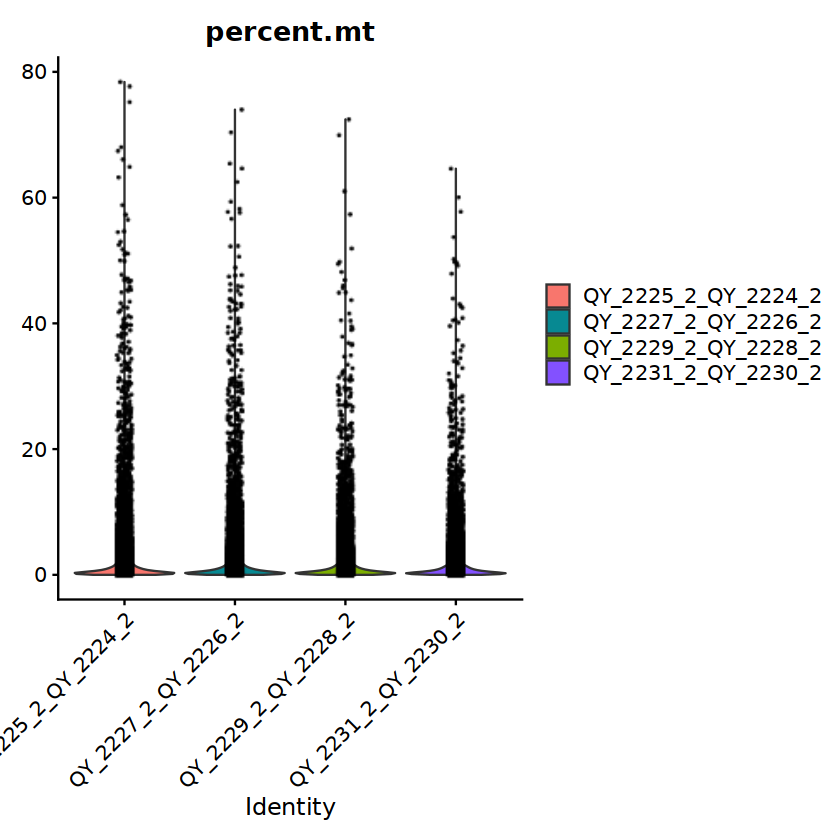

In [8]:
VlnPlot(sobj, "percent.mt", split.by = "orig.ident")

In [6]:
DefaultAssay(sobj) <- 'RNA'

In [7]:
sobj

An object of class Seurat 
219775 features across 80000 samples within 3 assays 
Active assay: RNA (36601 features, 0 variable features)
 2 other assays present: SCT, ATAC_comb

In [8]:
# library(harmony) no harmony for time constraints

Loading required package: Rcpp



In [10]:
Sys.time()
sobj <- NormalizeData(sobj, normalization.method = "LogNormalize", scale.factor = 10000)
sobj <- FindVariableFeatures(sobj, selection.method = "vst", nfeatures = 2000)
sobj <- ScaleData(sobj)
sobj <- RunPCA(sobj, features = VariableFeatures(object = sobj), verbose = F)
sobj <- FindNeighbors(sobj, dims = 1:10)
sobj <- FindClusters(sobj, resolution = 0.5)
sobj <- RunUMAP(sobj, dims = 1:10, verbose = F)
Sys.time()

[1] "2023-10-26 18:15:16 PDT"

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 80000
Number of edges: 2548353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9431
Number of communities: 25
Elapsed time: 15 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


[1] "2023-10-26 18:18:59 PDT"

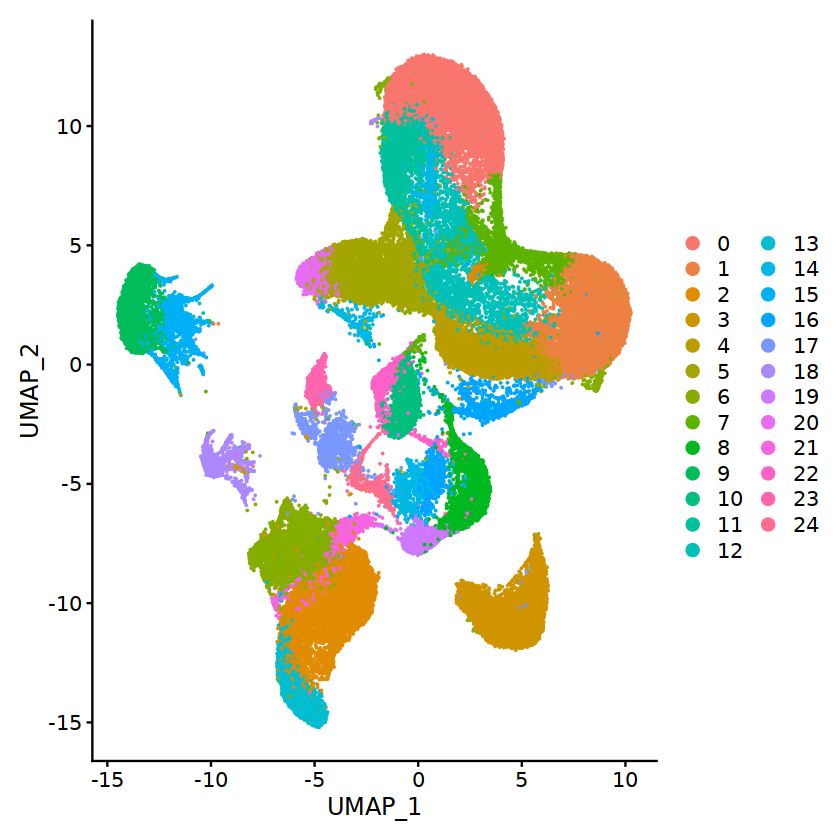

In [11]:
DimPlot(sobj )

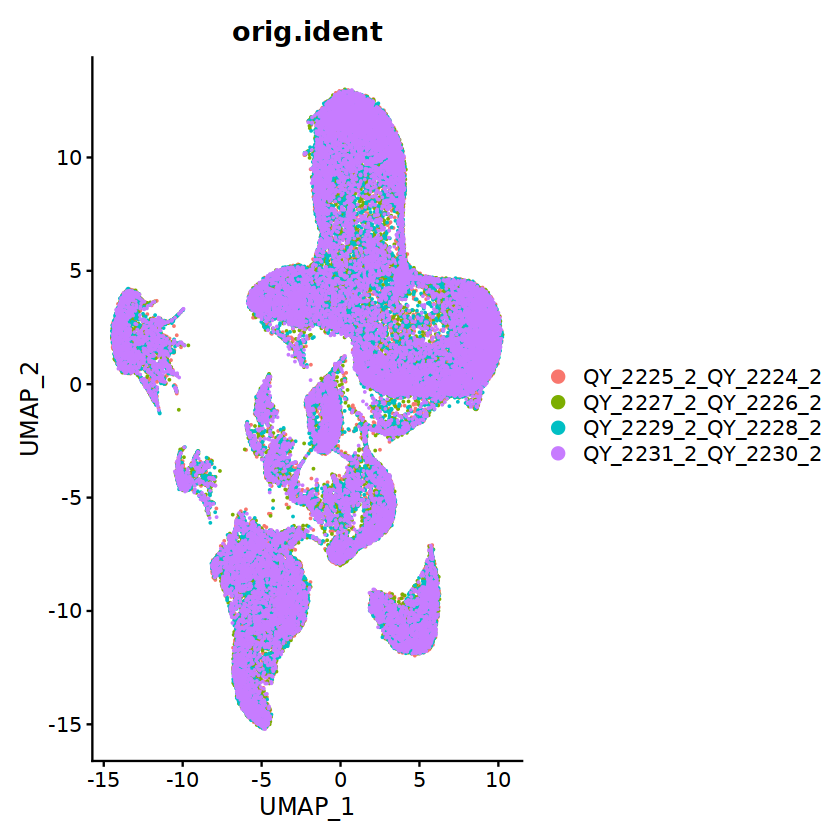

In [12]:
DimPlot(sobj, group.by = "orig.ident" )

In [13]:
DefaultAssay(sobj) <- "ATAC_comb"


In [14]:
sobj

An object of class Seurat 
219775 features across 80000 samples within 3 assays 
Active assay: ATAC_comb (151268 features, 0 variable features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

In [15]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [16]:
Sys.time()
sobj <- RunTFIDF(sobj) %>%
FindTopFeatures(min.cutoff = 'q0') %>%
RunSVD()
Sys.time()

[1] "2023-10-26 18:21:56 PDT"

Performing TF-IDF normalization

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from ATAC_comb_ to ATACcomb_”
Running SVD

Scaling cell embeddings



[1] "2023-10-26 18:25:52 PDT"

In [17]:
Sys.time()
sobj <- RunUMAP(sobj, reduction = 'lsi', dims = 2:30, verbose = F,
        reduction.name='umap.atac', reduction.key='atac_UMAP_')
Sys.time()




[1] "2023-10-26 18:27:06 PDT"

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from atac_UMAP_ to atacUMAP_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to atacUMAP_”


[1] "2023-10-26 18:29:38 PDT"

In [18]:
sobj <- FindNeighbors(sobj, reduction = 'lsi', dims = 2:30) %>%
FindClusters(algorithm = 3, resolution = .3, verbose = FALSE)

Computing nearest neighbor graph

Computing SNN



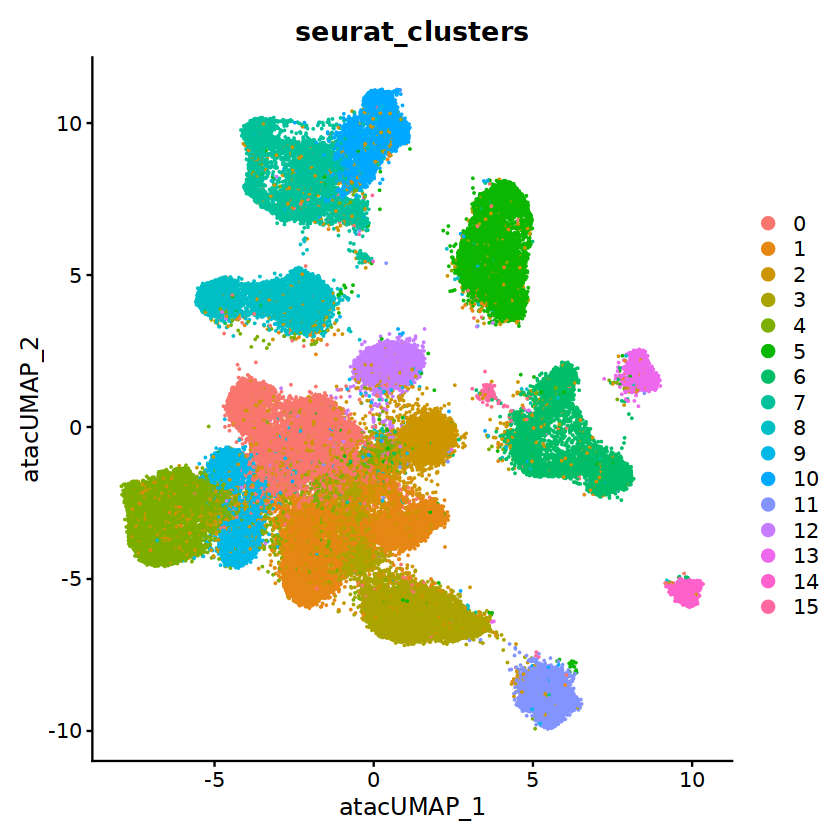

In [19]:

#pdf("/projects/ps-epigen/users/cmiciano/SenNet_Multiome/08_multiome_merge/230927_umap_batch_sctv2_atac_hrm.pdf")
DimPlot(sobj, reduction = "umap.atac", group.by = "seurat_clusters")
#dev.off()

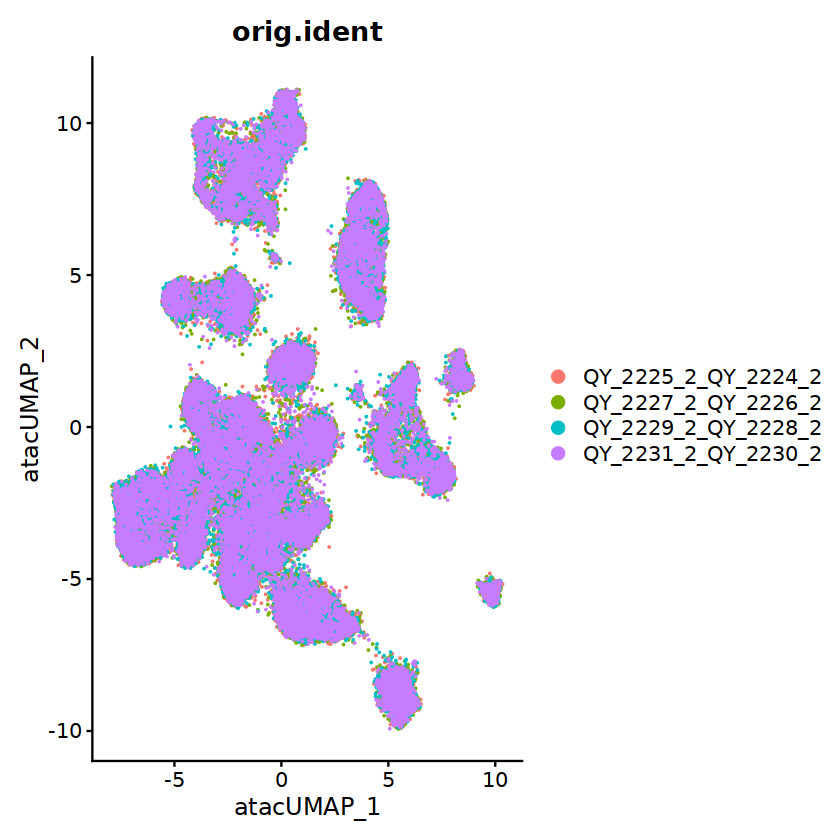

In [21]:
DimPlot(sobj, reduction = "umap.atac", group.by = "orig.ident")


In [ ]:
# wnn using no batch

In [22]:
Sys.time()
sobj <- FindMultiModalNeighbors(sobj, reduction.list=list('pca', 'lsi'), dims.list=list(1:50, 2:30),
            weighted.nn.name = "weighted.nn",
            snn.graph.name = "wsnn")
Sys.time()


[1] "2023-10-26 18:32:14 PDT"

Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph



[1] "2023-10-26 18:36:10 PDT"

In [23]:
Sys.time()
sobj <- RunUMAP(sobj, nn.name='weighted.nn', reduction.name='umap.wnn', reduction.key='wnn_UMAP_',
verbose = F)
Sys.time()

[1] "2023-10-26 18:36:47 PDT"

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from wnn_UMAP_ to wnnUMAP_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to wnnUMAP_”


[1] "2023-10-26 18:38:53 PDT"

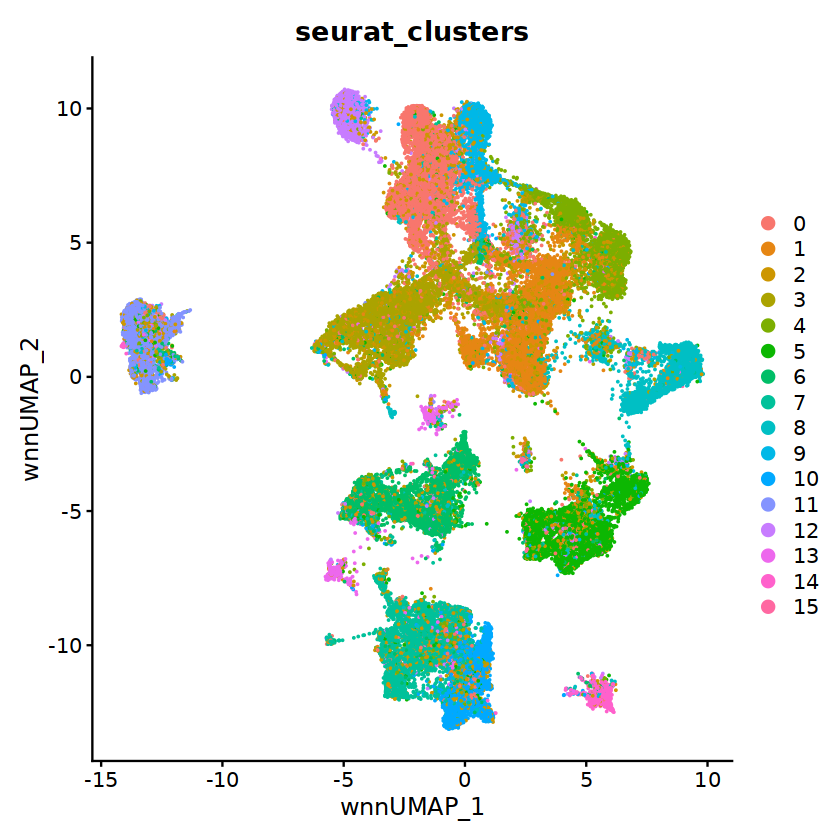

In [25]:
DimPlot(sobj, reduction = "umap.wnn", group.by = "seurat_clusters")


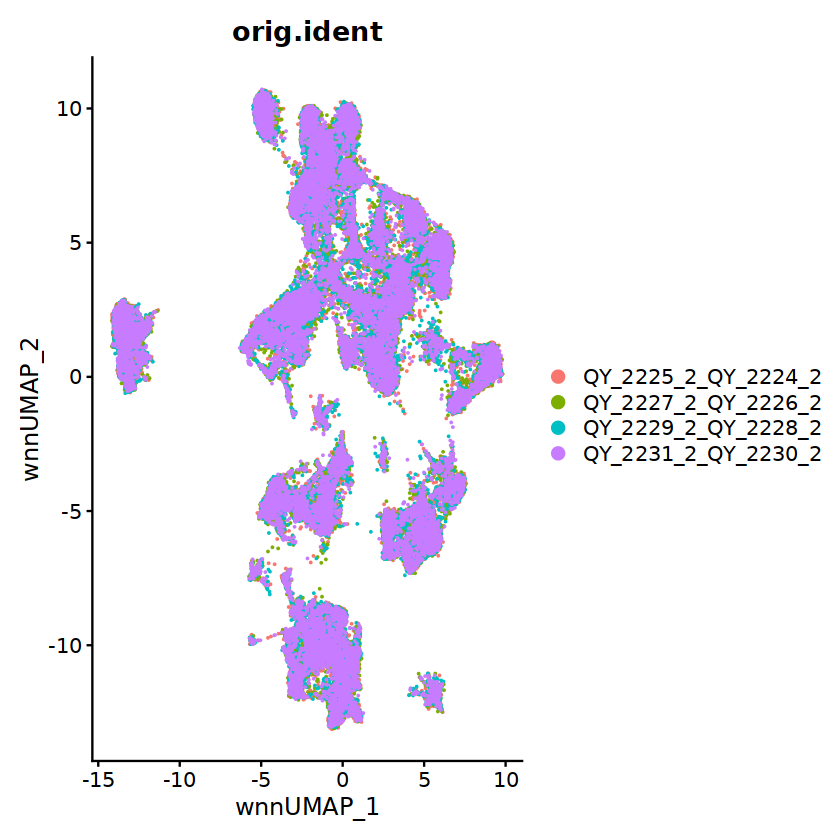

In [26]:
DimPlot(sobj, reduction = "umap.wnn", group.by = "orig.ident")


In [29]:
library(ggplot2)

In [43]:
options(repr.plot.width=18, repr.plot.height=6)
p1 <- DimPlot(sobj , reduction='umap', group.by='seurat_clusters', label=TRUE, label.size=3, repel=TRUE) + ggtitle('RNA')
p1 <- p1 + xlab('UMAP 1') + ylab('UMAP 2') + ggtitle('RNA only')
p2 <- DimPlot(sobj , reduction='umap.atac', group.by='seurat_clusters', label=TRUE, label.size=3, repel=TRUE) + ggtitle('ATAC')
p2 <- p2 + xlab('UMAP 1') + ylab('UMAP 2') + ggtitle('ATAC only')
p3 <- DimPlot(sobj , reduction='umap.wnn', group.by='seurat_clusters', label=TRUE, label.size=3, repel=TRUE) + ggtitle('WNN')
p3 <- p3 + xlab('UMAP 1') + ylab('UMAP 2') + ggtitle('WNN - Combined')
p4 <- p1 + p2 + p3 & NoLegend()

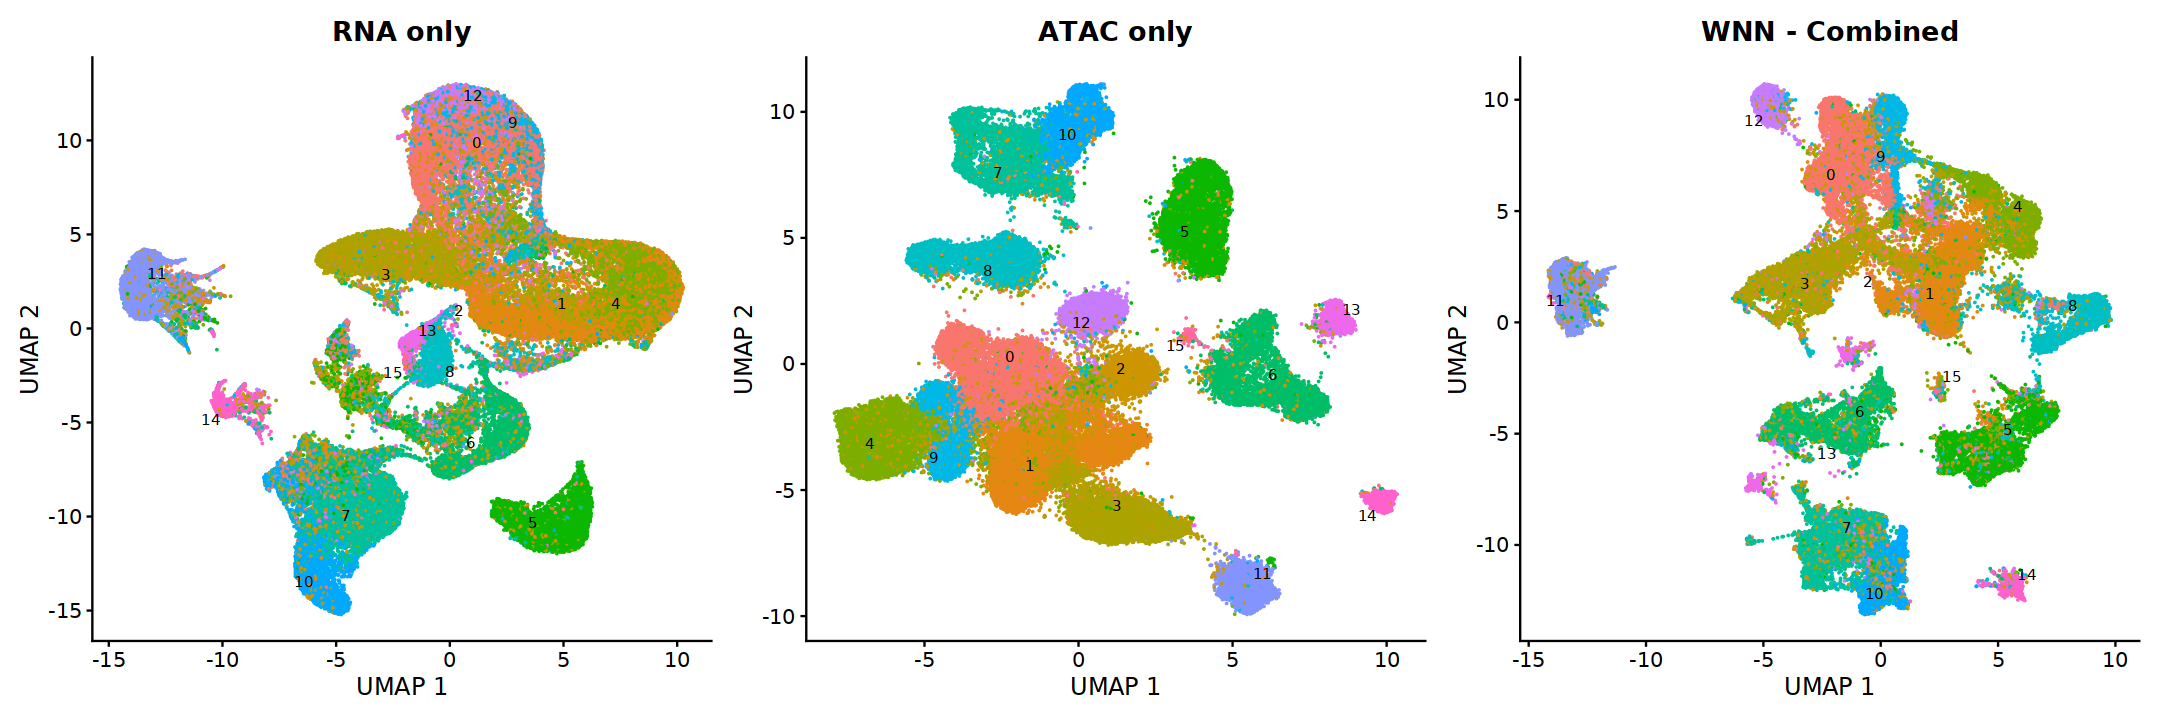

In [44]:
p4

In [45]:
pdf("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/03_multiome_merge/umaps_all_clust.pdf", width = 15, height = 5)
print(p4)
dev.off()

png 
  2

In [41]:
options(repr.plot.width=18, repr.plot.height=6)
p1 <- DimPlot(sobj , reduction='umap', group.by='orig.ident', label=TRUE, label.size=3, repel=TRUE) + ggtitle('RNA')
p1 <- p1 + xlab('UMAP 1') + ylab('UMAP 2') + ggtitle('RNA only')
p2 <- DimPlot(sobj , reduction='umap.atac', group.by='orig.ident', label=TRUE, label.size=3, repel=TRUE) + ggtitle('ATAC')
p2 <- p2 + xlab('UMAP 1') + ylab('UMAP 2') + ggtitle('ATAC only')
p3 <- DimPlot(sobj , reduction='umap.wnn', group.by='orig.ident', label=TRUE, label.size=3, repel=TRUE) + ggtitle('WNN')
p3 <- p3 + xlab('UMAP 1') + ylab('UMAP 2') + ggtitle('WNN - Combined')
p4 <- p1 + p2 + p3 & NoLegend()

In [42]:
pdf("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/03_multiome_merge/umaps_all_libid.pdf", width = 15, height = 5)
print(p4)
dev.off()

png 
  2

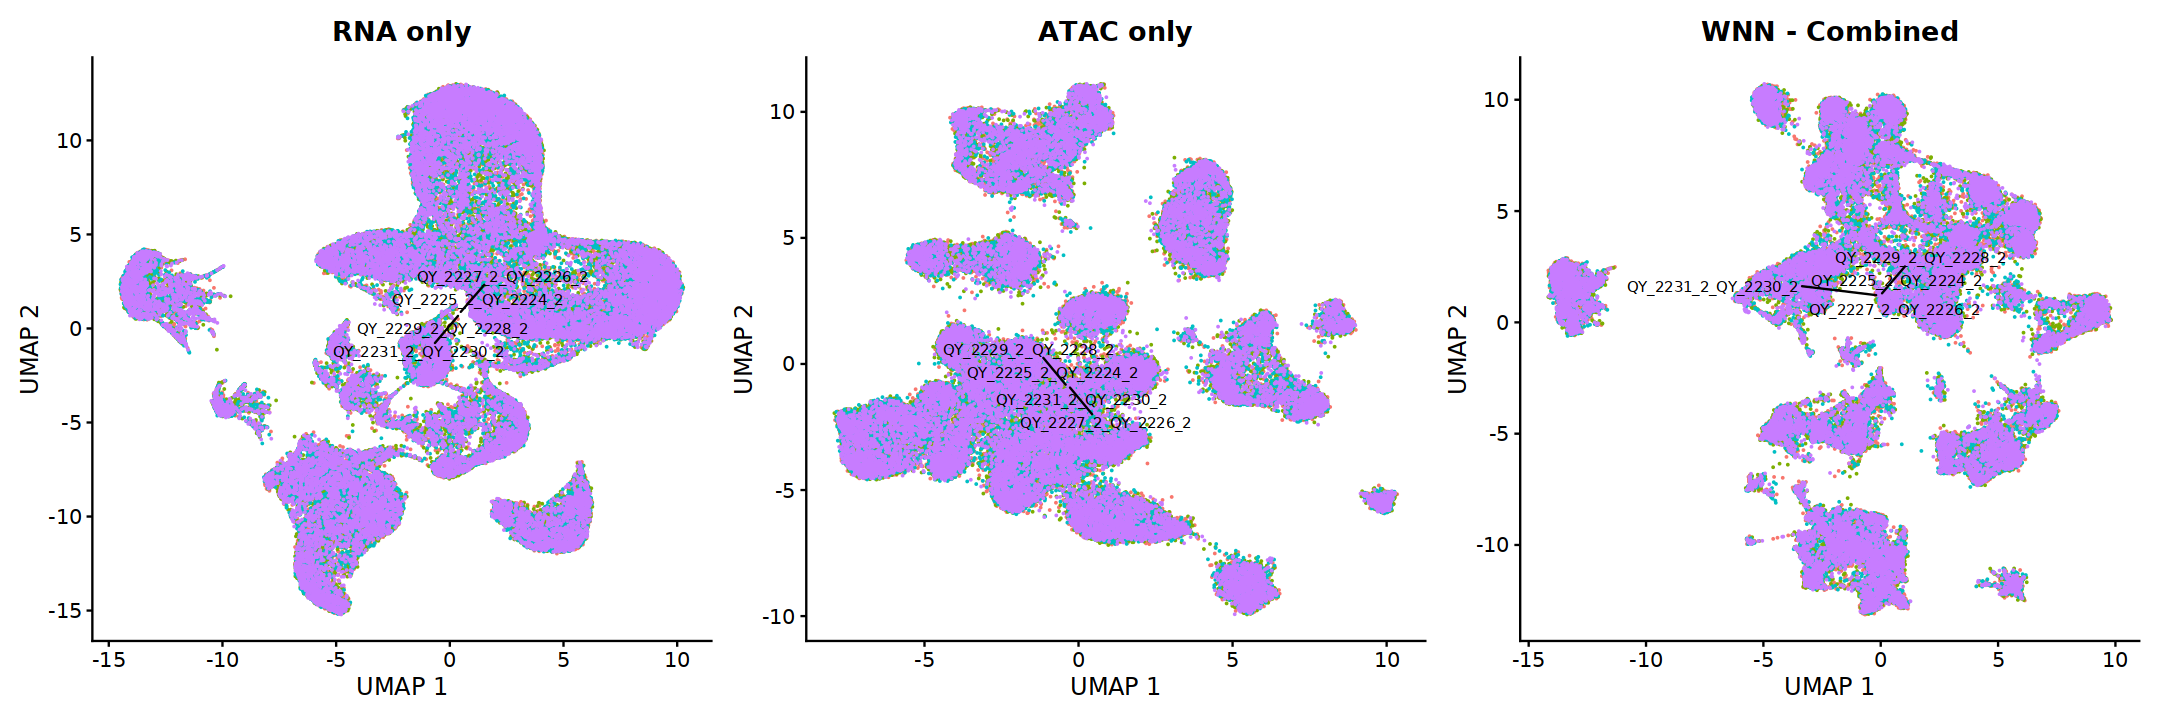

In [36]:
p4

In [46]:
## 
Sys.time()
saveRDS(sobj, "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/03_multiome_merge/231026_02_merged_multiome_lung4_clust.RDS")
Sys.time()

[1] "2023-10-26 18:50:45 PDT"

[1] "2023-10-26 19:05:18 PDT"